# Convert KLUE-RE to Prompt Dataset

In [3]:
import os
import torch
import time
import numpy as np
import pandas as pd

from datasets import load_dataset
from datasets import concatenate_datasets

import transformers
from transformers import (
    AutoConfig,
    AutoTokenizer,
    AutoModelForSequenceClassification,
)


In [2]:
os.getcwd()

'/opt/ml/PTR'

In [6]:
num2label = {0: 'no_relation', 1: 'org:top_members/employees', 2: 'org:members', 3: 'org:product', 4: 'per:title', 5: 'org:alternate_names', 6: 'per:employee_of', 7: 'org:place_of_headquarters', 8: 'per:product', 9: 'org:number_of_employees/members', 10: 'per:children', 11: 'per:place_of_residence', 12: 'per:alternate_names', 13: 'per:other_family', 14: 'per:colleagues', 15: 'per:origin', 16: 'per:siblings', 17: 'per:spouse', 18: 'org:founded', 19: 'org:political/religious_affiliation', 20: 'org:member_of', 21: 'per:parents', 22: 'org:dissolved', 23: 'per:schools_attended', 24: 'per:date_of_death', 25: 'per:date_of_birth', 26: 'per:place_of_birth', 27: 'per:place_of_death', 28: 'org:founded_by', 29: 'per:religion'}

In [4]:
# model = AutoModelForSequenceClassification.from_pretrained('klue/roberta-large', cache_dir='cache')

Some weights of the model checkpoint at klue/roberta-large were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.decoder.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at klue/roberta-large and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'class

In [4]:
tokenizer = AutoTokenizer.from_pretrained('klue/roberta-large', cache='cache')

/opt/conda/envs/basic/lib/python3.8/site-packages/transformers/configuration_utils.py:336: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [5]:
dataset = load_dataset(
    'jinmang2/load_klue_re', 
    script_version='v3.0.1b',
    cache_dir='cache_v3.0.1b',
)

Downloading:   0%|          | 0.00/7.41M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset klue_re downloaded and prepared to cache_v3.0.1b/klue_re/re/1.0.0/939e0a595583aa289f9bb8ade0e4ec6e7dcfb6e1293dd1ef2db2168a2b6579b5. Subsequent calls will reuse this data.


  0%|          | 0/5 [00:00<?, ?it/s]

In [7]:
dataset

DatasetDict({
    train: Dataset({
        features: ['guid', 'sentence', 'subject_entity', 'object_entity', 'label', 'source'],
        num_rows: 25931
    })
    valid: Dataset({
        features: ['guid', 'sentence', 'subject_entity', 'object_entity', 'label', 'source'],
        num_rows: 6487
    })
    aug1: Dataset({
        features: ['guid', 'sentence', 'subject_entity', 'object_entity', 'label', 'source'],
        num_rows: 3171
    })
    aug2: Dataset({
        features: ['guid', 'sentence', 'subject_entity', 'object_entity', 'label', 'source'],
        num_rows: 16247
    })
    test: Dataset({
        features: ['guid', 'sentence', 'subject_entity', 'object_entity', 'label', 'source'],
        num_rows: 7765
    })
})

In [8]:
def pre_convert_format(dataset):
    def prep(x, tokenizer=tokenizer, num2label=num2label):    
        token = tokenizer.tokenize(x['sentence'], add_special_tokens=False)
        h = {"name" : x['subject_entity']['word'],
              "pos" : [x['subject_entity']['start_idx'],
                     x['subject_entity']['end_idx']]}
        t = {"name" : x['object_entity']['word'],
              "pos" : [x['object_entity']['start_idx'],
                      x['object_entity']['end_idx']]}
        return {'token' : token, "h" : h, "t" : t, "relation" : num2label[x['label']]}
    ptr_dataset = dataset.map(prep)
    features_name = list(ptr_dataset['train'].features.keys())
#     features_name.pop(features_name.index("guid"))
    features_name.pop(features_name.index("token"))
    features_name.pop(features_name.index("h"))
    features_name.pop(features_name.index("t"))
    features_name.pop(features_name.index("relation"))
    ptr_dataset = ptr_dataset.remove_columns(features_name)
    return ptr_dataset

In [9]:
ptr_dataset = pre_convert_format(dataset)

  0%|          | 0/25931 [00:00<?, ?ex/s]

  0%|          | 0/6487 [00:00<?, ?ex/s]

  0%|          | 0/3171 [00:00<?, ?ex/s]

  0%|          | 0/16247 [00:00<?, ?ex/s]

  0%|          | 0/7765 [00:00<?, ?ex/s]

In [10]:
ptr_dataset

DatasetDict({
    train: Dataset({
        features: ['token', 'h', 't', 'relation'],
        num_rows: 25931
    })
    valid: Dataset({
        features: ['token', 'h', 't', 'relation'],
        num_rows: 6487
    })
    aug1: Dataset({
        features: ['token', 'h', 't', 'relation'],
        num_rows: 3171
    })
    aug2: Dataset({
        features: ['token', 'h', 't', 'relation'],
        num_rows: 16247
    })
    test: Dataset({
        features: ['token', 'h', 't', 'relation'],
        num_rows: 7765
    })
})

In [14]:
train_aug1 = concatenate_datasets([ptr_dataset['train'], ptr_dataset['aug1']])
train_aug2 = concatenate_datasets([ptr_dataset['train'], ptr_dataset['aug2']])
train_valid_aug1 = concatenate_datasets([ptr_dataset['train'], ptr_dataset['valid'], ptr_dataset['aug1']])
train_valid_aug2 = concatenate_datasets([ptr_dataset['train'], ptr_dataset['valid'], ptr_dataset['aug2']])

data_path = 'datasets/klue-re/v301b'
if not os.path.exists(data_path):
    os.mkdir(data_path)

In [16]:
train_aug1.to_json(os.path.join(data_path, 'train_aug1.txt'), force_ascii=True)
train_aug2.to_json(os.path.join(data_path, 'train_aug2.txt'), force_ascii=True)
train_valid_aug1.to_json(os.path.join(data_path, 'train_valid_aug1.txt'), force_ascii=True)
train_valid_aug2.to_json(os.path.join(data_path, 'train_valid_aug2.txt'), force_ascii=True)

Creating json from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/4 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/5 [00:00<?, ?ba/s]

38190015

In [17]:
ptr_dataset['train'].to_json(os.path.join(data_path, 'train.txt'), force_ascii=True)
ptr_dataset['valid'].to_json(os.path.join(data_path, 'val.txt'), force_ascii=True)
ptr_dataset['test'].to_json(os.path.join(data_path, 'test.txt'), force_ascii=True)

Creating json from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

5646898

---

## 파일 이동

In [18]:
%pwd

'/opt/ml/PTR'

In [14]:
!cp /opt/ml/klue-level2-nlp-14/v301b/train_aug1.txt /opt/ml/PTR/datasets/klue-re/train.txt

In [103]:
!mv /opt/ml/klue-level2-nlp-14/v301b/val.txt /opt/ml/PTR/datasets/klue-re/val.txt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


---

In [ ]:
from solution.data import (
    COLLATOR_MAP,
    PREP_PIPELINE,
)
from solution.utils import (
    softmax,
    set_seeds,
    TASK_METRIC_MAP,
    TASK_INFOS_MAP,
    CONFIG_FILE_NAME,
    PYTORCH_MODEL_NAME,
)

In [25]:
collate_cls = COLLATOR_MAP[data_args.collator_name]
pipeline = PREP_PIPELINE[data_args.prep_pipeline_name]
data_collator = collate_cls(tokenizer)

# Preprocess and tokenizing
tokenized_datasets = pipeline(dataset,
                              tokenizer,
                              task_infos,)


NameError: name 'COLLATOR_MAP' is not defined

In [ ]:
dataset['valid']

In [24]:
dataset['valid'][0]

{'guid': '1',
 'sentence': '호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으로 재탄생한다.',
 'subject_entity': {'word': '민주평화당',
  'start_idx': 19,
  'end_idx': 23,
  'type': 'ORG'},
 'object_entity': {'word': '대안신당',
  'start_idx': 14,
  'end_idx': 17,
  'type': 'ORG'},
 'label': 0,
 'source': 'wikitree'}

In [48]:
tokenizer.mask_token

'[MASK]'

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

In [13]:
tokenizer.tokenize('대상 관계없다 대상')

['대상', '관계', '##없', '##다', '대상']

## 01. org:top_members/employees

In [15]:
tokenizer.tokenize('기관의 고용주는 사람')

['기관', '##의', '고용주', '##는', '사람']

## 02. org:members

In [21]:
tokenizer.tokenize('기관에 소속된 기관')

['기관', '##에', '소속', '##된', '기관']

## 03. per:title

In [28]:
tokenizer.tokenize('사람의 이름은 이름')

['사람', '##의', '이름', '##은', '이름']

## 04. org:alternate_names

In [36]:
tokenizer.tokenize('기관(기관)기관')

['기관', '(', '기관', ')', '기관']

## 05. per:employee_of

In [41]:
tokenizer.tokenize('사람의 회사는 기관')

['사람', '##의', '회사', '##는', '기관']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

## 00. no_relation

In [12]:
tokenizer.tokenize('개념 관계없다 개념')

['개념', '관계', '##없', '##다', '개념']

In [2]:
RELATION_CLASS = [
    'no_relation', 
    'org:top_members/employees',
    'org:members',
    'org:product',
    'per:title',
    'org:alternate_names',
    'per:employee_of',
    'org:place_of_headquarters',
    'per:product',
    'org:number_of_employees/members',
    'per:children',
    'per:place_of_residence', 
    'per:alternate_names',
    'per:other_family',
    'per:colleagues',
    'per:origin', 
    'per:siblings',
    'per:spouse',
    'org:founded',
    'org:political/religious_affiliation',
    'org:member_of',
    'per:parents',
    'org:dissolved',
    'per:schools_attended',
    'per:date_of_death', 
    'per:date_of_birth',
    'per:place_of_birth',
    'per:place_of_death',
    'org:founded_by',
    'per:religion'
]

label2idx = {'no_relation': 0, 'org:top_members/employees': 1, 'org:members': 2, 'org:product': 3, 'per:title': 4, 'org:alternate_names': 5, 'per:employee_of': 6, 'org:place_of_headquarters': 7, 'per:product': 8, 'org:number_of_employees/members': 9, 'per:children': 10, 'per:place_of_residence': 11, 'per:alternate_names': 12, 'per:other_family': 13, 'per:colleagues': 14, 'per:origin': 15, 'per:siblings': 16, 'per:spouse': 17, 'org:founded': 18, 'org:political/religious_affiliation': 19, 'org:member_of': 20, 'per:parents': 21, 'org:dissolved': 22, 'per:schools_attended': 23, 'per:date_of_death': 24, 'per:date_of_birth': 25, 'per:place_of_birth': 26, 'per:place_of_death': 27, 'org:founded_by': 28, 'per:religion': 29}
idx2label = {0: 'no_relation', 1: 'org:top_members/employees', 2: 'org:members', 3: 'org:product', 4: 'per:title', 5: 'org:alternate_names', 6: 'per:employee_of', 7: 'org:place_of_headquarters', 8: 'per:product', 9: 'org:number_of_employees/members', 10: 'per:children', 11: 'per:place_of_residence', 12: 'per:alternate_names', 13: 'per:other_family', 14: 'per:colleagues', 15: 'per:origin', 16: 'per:siblings', 17: 'per:spouse', 18: 'org:founded', 19: 'org:political/religious_affiliation', 20: 'org:member_of', 21: 'per:parents', 22: 'org:dissolved', 23: 'per:schools_attended', 24: 'per:date_of_death', 25: 'per:date_of_birth', 26: 'per:place_of_birth', 27: 'per:place_of_death', 28: 'org:founded_by', 29: 'per:religion'}

In [3]:
df_pred = torch.load('./analysis/cm_test/data_frame.pt')

In [4]:
df_pred.sample(5)

,id,pred_label,probs
20185,20185,2,"[0.18569493293762207, 0.002193967578932643, 0...."
19173,19173,0,"[0.981487512588501, 0.014307132922112942, 0.00..."
21091,21091,0,"[0.9423018097877502, 0.0005098124383948743, 0...."
26009,26009,0,"[0.9829094409942627, 0.00018666985852178186, 0..."
1588,1588,6,"[0.011899792589247227, 0.0005476642982102931, ..."


In [5]:
df_target = load_dataset('jinmang2/load_klue_re', script_version='v1.0.0', cache_dir='cache')

Reusing dataset klue_re (cache/klue_re/re/1.0.0/47fe3e2e84900d0256ec512400db2c622564eac0e0be3d49ddaadeda090bfb4d)


  0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
df_pred['label'] = df_target['train']['label']

In [7]:
df_pred['label']

0         0
1         0
2        20
3         1
4         0
         ..
32465     6
32466    14
32467     1
32468     0
32469     1
Name: label, Length: 32470, dtype: int64

In [8]:
from transformers import (
    AutoConfig,
    AutoTokenizer,
    AutoModelForSequenceClassification,
)

In [16]:
checkpoint = '/opt/ml/klue_dir/roberta-large-second'
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, output_hidden_states=True)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

/opt/conda/envs/basic/lib/python3.8/site-packages/transformers/configuration_utils.py:336: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(32004, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
         

In [17]:
embeddings = np.load('./analysis/cm_test/embeddings.npy')

In [18]:
df_embeddings = pd.DataFrame(np.hstack((embeddings, df_pred['label'].values.reshape(-1, 1))))

In [19]:
df_embeddings.columns = list(range(model.config.hidden_size)) + ['label']

In [20]:
df_embeddings.label = df_embeddings.label.astype(int)

# PCA(2D)

In [21]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_embeddings.values[:, :-1])
df_embeddings['pca-one'] = pca_result[:,0]
df_embeddings['pca-two'] = pca_result[:,1] 
df_embeddings['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.16382299 0.14303308 0.09749119]


In [22]:
df_embeddings['pred_label'] = df_pred.pred_label

In [23]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df_embeddings.shape[0])

In [24]:
df_embedding_pca3d = df_embeddings.iloc[:,-5:]

In [25]:
df_embedding_pca3d

,label,pca-one,pca-two,pca-three,pred_label
0,0,-0.808089,3.066009,-8.619202,0
1,0,-11.151556,-3.746235,-2.810781,0
2,20,0.957902,1.330982,13.220352,20
3,1,14.931480,-12.449183,-4.087808,1
4,0,-12.557141,-4.045069,-6.336243,0
...,...,...,...,...,...
32465,6,5.707769,11.241233,-3.043067,6
32466,14,-2.600823,0.300875,-4.503234,14
32467,1,15.045038,-12.043777,-4.463202,1
32468,0,-11.277070,-2.907219,-1.626328,0


In [26]:
miss_label_list = [label2idx['per:place_of_residence'],
                   label2idx['per:origin'],
                   label2idx['per:place_of_birth']]

In [27]:
miss_label_list

[11, 15, 26]

In [28]:
miss_label_idx = df_pred[df_pred.pred_label != df_pred.label].id
miss_label_idx = miss_label_idx.astype(int)

df_target_pd = df_target['train'].to_pandas()
df_target_pd['pred_label'] = df_pred['pred_label']

In [29]:
df_target_pd.loc[miss_label_idx, :]

,guid,sentence,subject_entity,object_entity,label,source,pred_label
26,26,본가가 양돈업을 운영하고 있었던 점도 있어 닛폰햄 구단주인 오코소 요시노리는 가족도...,"{'word': '닛폰햄', 'start_idx': 24, 'end_idx': 26...","{'word': '오코소 요시노리', 'start_idx': 33, 'end_idx...",0,wikipedia,1
27,27,"1824년에 있었던 첫 졸업식에는 대통령 제임스 먼로와 존 C. 칼훈, 헨리 클레이...","{'word': '존 C. 칼훈', 'start_idx': 31, 'end_idx'...","{'word': '제임스 먼로', 'start_idx': 23, 'end_idx':...",0,wikipedia,14
42,42,"2008-09 시즌, 그는 페페의 10경기 출장 정지 징계로부터 수혜를 받은 선수로...","{'word': '세비야', 'start_idx': 56, 'end_idx': 58...","{'word': '스페인', 'start_idx': 119, 'end_idx': 1...",20,wikipedia,7
98,98,"헌종 성화제의 서4남이자 효종 홍치제의 이복 동생이며, 세종 가정제의 생부이다.","{'word': '성화제', 'start_idx': 3, 'end_idx': 5, ...","{'word': '홍치제', 'start_idx': 17, 'end_idx': 19...",0,wikipedia,13
125,125,그룹 '소녀시대' 출신 제시카가 중국 매니지먼트에 20억 원대 피소를 당했다.,"{'word': '소녀시대', 'start_idx': 4, 'end_idx': 7,...","{'word': '제시카', 'start_idx': 13, 'end_idx': 15...",15,wikitree,0
...,...,...,...,...,...,...,...
32422,32422,이어 16일 스페인 바스크 자치정부의 이니고 우를클루 주지사를 만나 폐광으로 침체됐...,"{'word': '바스크', 'start_idx': 11, 'end_idx': 13...","{'word': '빌바오', 'start_idx': 48, 'end_idx': 50...",2,wikitree,0
32432,32432,"또한 그는 현종의 정비인 명성왕후의 사촌 오빠에 청풍부원군 김우명의 조카이고, 숙종...","{'word': '명성왕후', 'start_idx': 14, 'end_idx': 1...","{'word': '인경왕후', 'start_idx': 52, 'end_idx': 5...",0,wikipedia,13
32433,32433,"2008년 11월 5일, 드미트리 메드베데프 러시아 대통령은 모스크바 크렘린궁에서 ...","{'word': '드미트리 메드베데프', 'start_idx': 14, 'end_i...","{'word': '러시아', 'start_idx': 25, 'end_idx': 27...",11,wikipedia,15
32438,32438,"간 나오토는 총리 취임에 즈음해 당 간사장에 에다노 유키오, 내각관방장관에 센고쿠 ...","{'word': '에다노 유키오', 'start_idx': 25, 'end_idx'...","{'word': '센고쿠 요시토', 'start_idx': 42, 'end_idx'...",0,wikipedia,14


In [30]:
def pca2d(df_n, gt=True):
    df_new = df_n.reset_index(drop=True)
    rndperm = np.random.permutation(df_new.shape[0])
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="pca-one", y="pca-two",
        hue="label" if gt else "pred_label",
        palette=sns.color_palette("hls",\
                      len(df_new.label.unique() \
                      if gt else df_new.pred_label.unique())),
        data=df_new.loc[rndperm, :],
        legend="full",
        alpha=0.3
    )

In [34]:
def pca2d_miss_label(df_n, gt=True):
    df_new = df_n.loc[miss_label_idx,:].reset_index(drop=True)
    rndperm = np.random.permutation(df_new.shape[0])
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="pca-one", y="pca-two",
        hue="label" if gt else "pred_label",
        palette=sns.color_palette("hls",\
                      len(df_new.label.unique() \
                      if gt else df_new.pred_label.unique())),
        data=df_new.loc[rndperm, :],
        legend="full",
        alpha=0.8
    )

### whole data

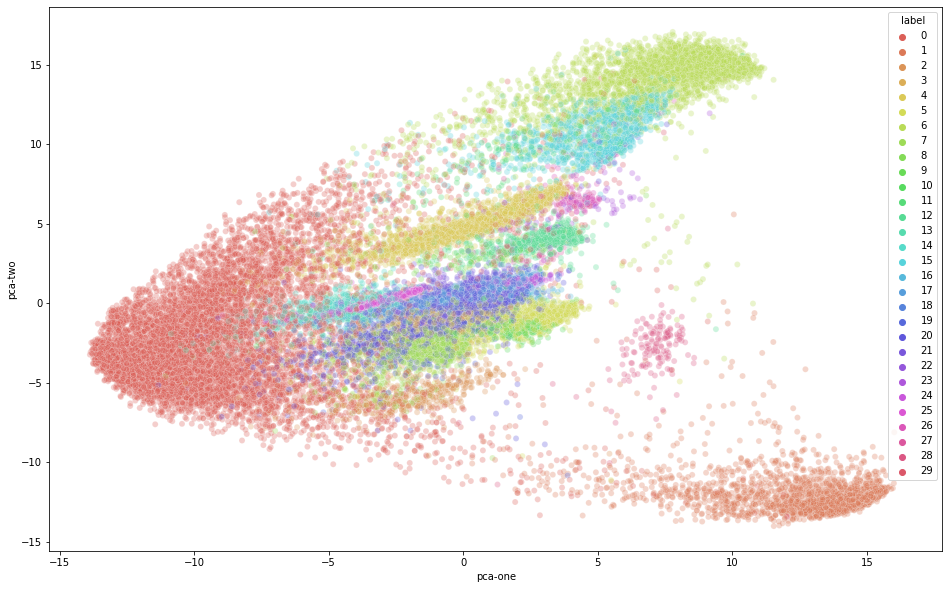

In [32]:
# Ground Truth
pca2d(df_embedding_pca3d)

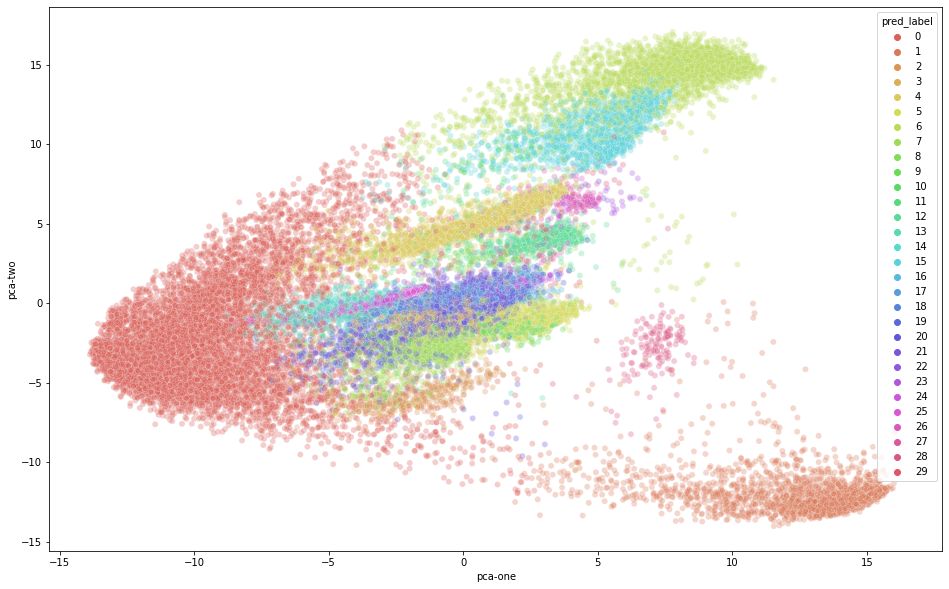

In [33]:
# Predict
pca2d(df_embedding_pca3d, False)

### miss labeling data

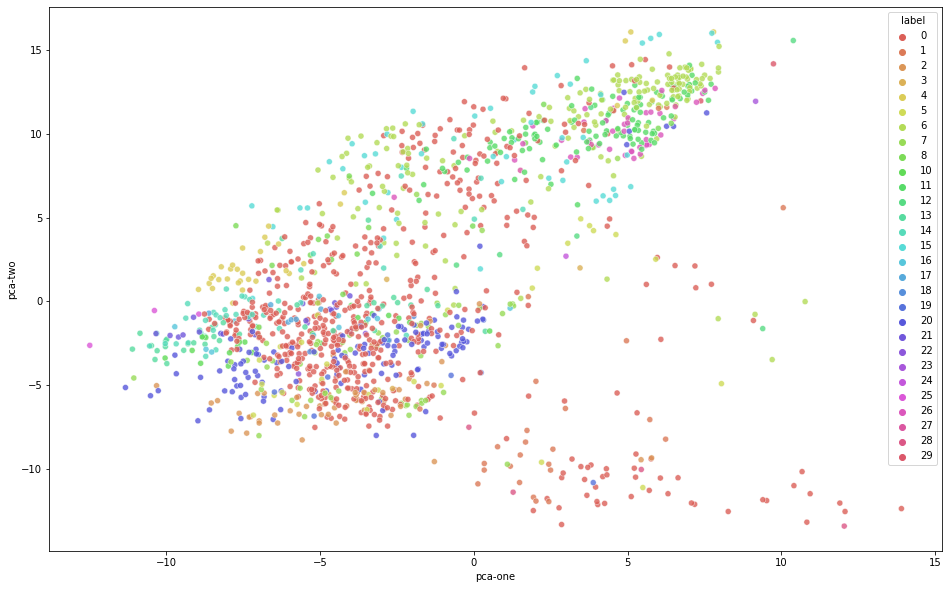

In [35]:
# Ground Truth
pca2d_miss_label(df_embedding_pca3d, True)

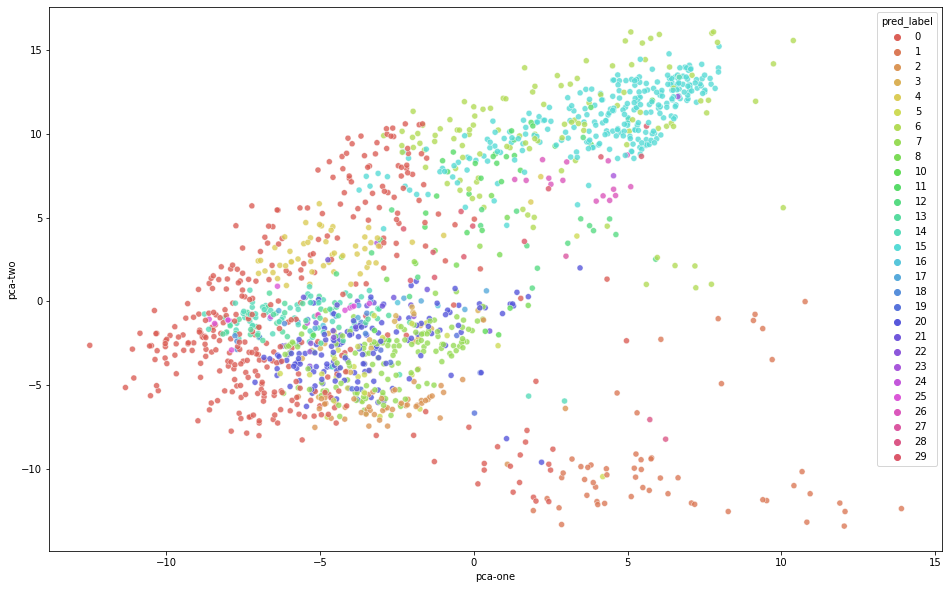

In [36]:
# Predict
pca2d_miss_label(df_embedding_pca3d, False)

- 이상치 탐지에 활용할 수 있는 DBSCAN을 이용해, 30개 군집을 구성, 이것의 이상치로 설정된 샘플 가운데서 val set을 샘플링함
- 위에서 찾은 miss labeling 데이터에 이를 추가하여 최종 val set 구성

In [37]:
# https://claryk.tistory.com/7
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import DBSCAN


In [38]:
np_embedding_pca3d = df_embedding_pca3d.values[:, 1:-1]

#### 30 cluster

In [121]:
# 30 cluster
dbscan = DBSCAN(eps=0.441, min_samples=19).fit(np_embedding_pca3d)

In [122]:
labels = dbscan.labels_
pd.Series(labels).value_counts()

-1     15058
 3      3522
 0      3505
 5      2019
 4      1870
 7      1590
 1      1448
 6       800
 8       792
 2       787
 10      169
 12      164
 16      132
 11      113
 14       93
 9        64
 17       40
 19       39
 23       27
 27       27
 15       25
 18       22
 26       20
 13       20
 24       19
 22       18
 21       18
 29       18
 25       18
 20       17
 28       16
dtype: int64

In [123]:
df_embedding_pca3d['dbscan_label'] = labels

In [124]:
df_embedding_pca3d

,label,pca-one,pca-two,pca-three,pred_label,dbscan_label
0,0,-0.808089,3.066009,-8.619202,0,-1
1,0,-11.151556,-3.746235,-2.810781,0,-1
2,20,0.957902,1.330982,13.220352,20,-1
3,1,14.931480,-12.449183,-4.087808,1,0
4,0,-12.557141,-4.045069,-6.336243,0,1
...,...,...,...,...,...,...
32465,6,5.707769,11.241233,-3.043067,6,-1
32466,14,-2.600823,0.300875,-4.503234,14,-1
32467,1,15.045038,-12.043777,-4.463202,1,0
32468,0,-11.277070,-2.907219,-1.626328,0,-1


In [125]:
def pca2d_dbscan_label(df_n, gt=True, outlier='with_out'):
    if outlier == 'with_out':
        df_new = df_n.loc[df_n.dbscan_label != -1,:].reset_index(drop=True)
    elif outlier == 'with':
        df_new = df_n.loc[df_n.dbscan_label == -1,:].reset_index(drop=True)
    elif outlier == 'only':
        df_new = df_n.reset_index(drop=True)

    rndperm = np.random.permutation(df_new.shape[0])
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="pca-one", y="pca-two",
        hue="label" if gt else "dbscan_label",
        palette=sns.color_palette("hls",\
                      len(df_new.label.unique() \
                      if gt else df_new.dbscan_label.unique())),
        data=df_new,
        legend="full",
        alpha=0.8
    )

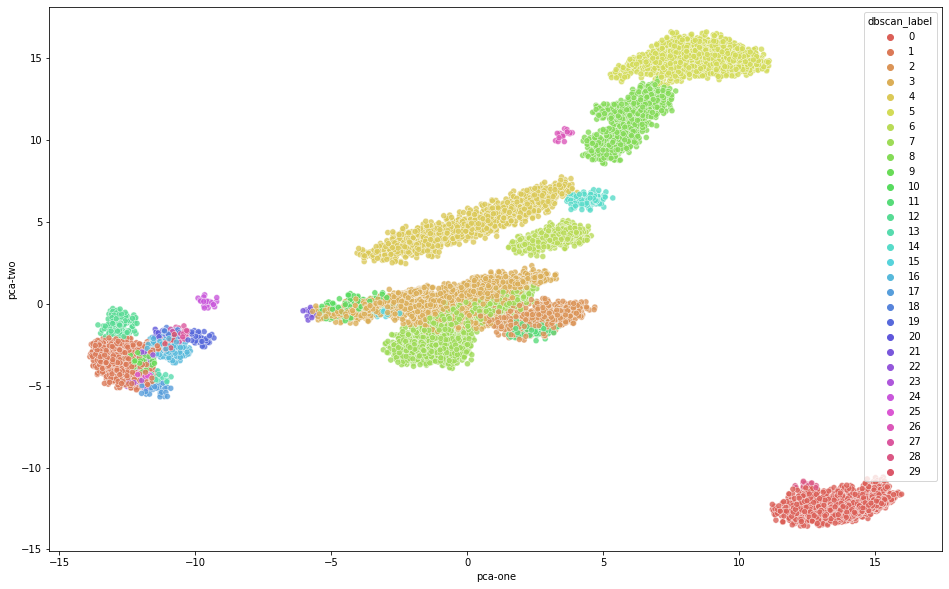

In [126]:
pca2d_dbscan_label(df_embedding_pca3d, gt=False, outlier='with_out')

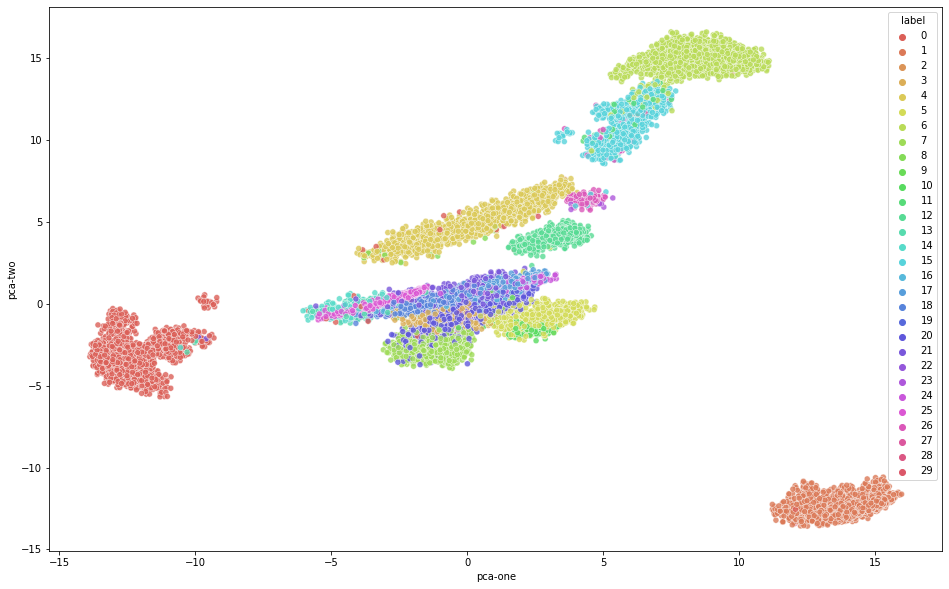

In [127]:
pca2d_dbscan_label(df_embedding_pca3d, gt=True, outlier='with_out')

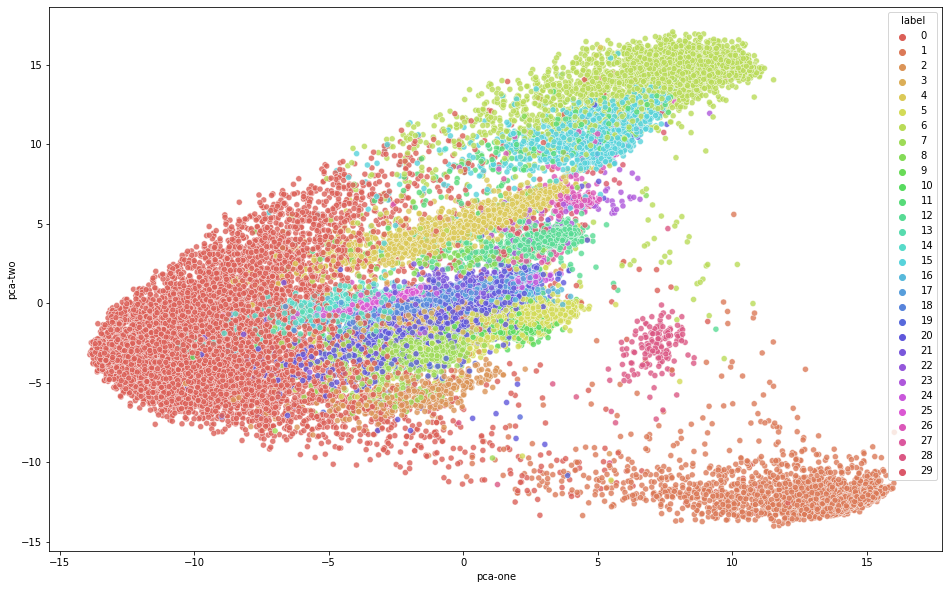

In [128]:
pca2d_dbscan_label(df_embedding_pca3d, gt=True, outlier='only')

# Val set alignment

## 오답 데이터셋에서의 정답 레이블 분포 vs 모델 예측 레이블 분포

In [156]:
miss_label_idx = df_pred[df_pred.pred_label != df_pred.label].id
miss_label_idx = miss_label_idx.astype(int)

df_miss_label = df_embedding_pca3d.loc[miss_label_idx,:].copy()

In [157]:
df_miss_label.head()

,label,pca-one,pca-two,pca-three,pred_label,dbscan_label
26,0,3.189604,-9.414201,-5.842546,1,-1
27,0,-7.755759,-0.108895,-7.043541,14,-1
42,20,-2.798555,-2.638186,14.021968,7,-1
98,0,-4.253384,-2.346208,1.040838,13,-1
125,15,0.208762,1.934433,-7.774005,0,-1


train set에 대하여 모델이 잘못 분류한 경우의 데이터에서의  
정답 label과 모델이 예측한 label의 분포. 4~19까지의 레이블에 대한 분포차이가 두드러짐.

<AxesSubplot:>

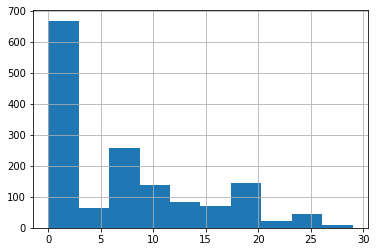

In [291]:
# 1. 오답 데이터셋에서의 정답 label 분포
df_miss_label.label.hist()

<AxesSubplot:>

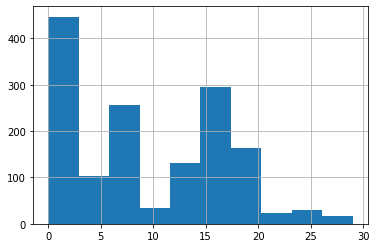

In [295]:
# 2. 오답 데이터셋에서의 예측 label 분포
df_miss_label.pred_label.hist()

## 학습 데이터셋에서의 정답 레이블 분포 vs 모델 예측 레이블 분포

정답 label의 분포와 거의 동일한 분포를 보임

<AxesSubplot:>

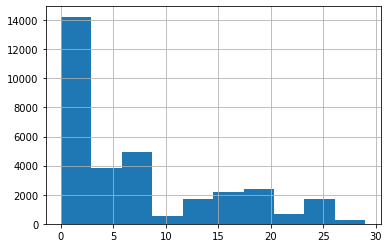

In [292]:
# 3. 정답 label 분포
df_pred.label.hist()

<AxesSubplot:>

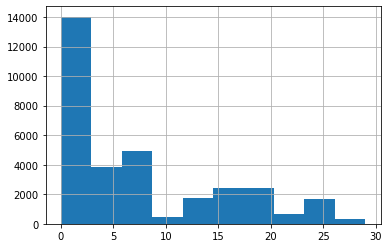

In [294]:
# 4.모델(RoBERTa) 예측 label 분포
df_pred.pred_label.hist()

## DBSCAN을 이용한 val set 구성

- DBSCAN을 통해 이상치 탐지가 가능함을 이용하여 군집을 이루지 못한 샘플들을 이용해 validation set을 구성한다.
  - 기존 레이블과 동일한 30개 군집 구성 후 이상치에 대해서 Stratified K-Fold 적용, 10개의 후보 인덱스 생성
- 최종 구성 : 모델이 오분류한 샘플 인덱스 + DBSCAN을 통해 얻은 인덱스

In [185]:
from sklearn.model_selection import StratifiedKFold

In [273]:
df_outlier = df_embedding_pca3d.query('dbscan_label == -1')
skf = StratifiedKFold(n_splits=10,random_state=None, shuffle=False)

In [274]:
skf.get_n_splits(X=df_outlier, y=df_outlier.label)

10

In [275]:
k_folds = list(skf.split(df_outlier, df_outlier.label))

In [276]:
k_folds[0][1].shape

(1506,)

In [277]:
df_outlier_new.iloc[k_folds[0][1]].head()

,index,label,pca-one,pca-two,pca-three,pred_label,dbscan_label
0,0,0,-0.808089,3.066009,-8.619202,0,-1
1,1,0,-11.151556,-3.746235,-2.810781,0,-1
2,2,20,0.957902,1.330982,13.220352,20,-1
3,8,7,-2.930414,-5.346490,10.611747,7,-1
4,9,6,6.439824,13.899467,-2.188106,6,-1


In [280]:
def get_valset():
    df_outlier_new = df_outlier.reset_index()
    
    n = 10
    
    cands = []
    # indices of df_outlier, need to convert for train.csv
    for i in range(n):
        train_set_idx = np.arange(len(df_embedding_pca3d))
        val_set_idx = df_outlier_new.iloc[k_folds[i][1], 0].values
        train_set_idx = np.array(list(set(train_set_idx) - set(val_set_idx)))

        inter_set = np.array(list(set(miss_label_idx) & set(val_set_idx)))
        val_set_idx = np.array(list(set(miss_label_idx) | set(val_set_idx)))
        print(f"n_samples of train/val/inter/union : {len(train_set_idx)}, {len(val_set_idx)}, {len(inter_set)}")
        cands.append({'train':train_set_idx, 'valid':val_set_idx, 'inter' : inter_set})
    return cands
        

In [281]:
cands = get_valset()

n_samples of train/val/inter/union : 30964, 2894, 114
n_samples of train/val/inter/union : 30964, 2874, 134
n_samples of train/val/inter/union : 30964, 2887, 121
n_samples of train/val/inter/union : 30964, 2885, 123
n_samples of train/val/inter/union : 30964, 2866, 142
n_samples of train/val/inter/union : 30964, 2890, 118
n_samples of train/val/inter/union : 30964, 2882, 126
n_samples of train/val/inter/union : 30964, 2869, 139
n_samples of train/val/inter/union : 30965, 2881, 126
n_samples of train/val/inter/union : 30965, 2871, 136


In [282]:
len(set(miss_label_idx) | set(outlier_idx))

4267

In [283]:
from sklearn.metrics import f1_score, precision_recall_curve, auc

In [284]:
label_list = ['no_relation', 'org:top_members/employees', 'org:members',
   'org:product', 'per:title', 'org:alternate_names',
   'per:employee_of', 'org:place_of_headquarters', 'per:product',
   'org:number_of_employees/members', 'per:children',
   'per:place_of_residence', 'per:alternate_names',
   'per:other_family', 'per:colleagues', 'per:origin', 'per:siblings',
   'per:spouse', 'org:founded', 'org:political/religious_affiliation',
   'org:member_of', 'per:parents', 'org:dissolved',
   'per:schools_attended', 'per:date_of_death', 'per:date_of_birth',
   'per:place_of_birth', 'per:place_of_death', 'org:founded_by',
   'per:religion']
no_relation_label_idx = label_list.index("no_relation")
label_indices = list(range(len(label_list)))
label_indices.remove(no_relation_label_idx)


In [285]:
for i in range(len(cands)):
    cur_train_idx = cands[i]['train']
    cur_train_target = df_embedding_pca3d.loc[cur_train_idx, 'label'].values
    cur_val_idx = cands[i]['valid']
    cur_target = df_embedding_pca3d.loc[cur_val_idx, 'label'].values
    cur_pred = df_embedding_pca3d.loc[cur_val_idx, 'pred_label'].values
    
    # Compute f1 score w/o `no_relation` label
    f1 = f1_score(cur_target, cur_pred, average='micro', labels=label_indices)
        
    print(f"{i}th val set f1 : {f1}")

0th val set f1 : 0.4016110471806674
1th val set f1 : 0.40057636887608067
2th val set f1 : 0.4012665515256189
3th val set f1 : 0.3974507531865585
4th val set f1 : 0.3949970913321698
5th val set f1 : 0.4033275960986804
6th val set f1 : 0.4009216589861751
7th val set f1 : 0.39710144927536234
8th val set f1 : 0.39884393063583823
9th val set f1 : 0.3935860058309038


마지막 train/val set에서의 target/pred label의 분포

(array([13379.,  3709.,  4701.,   510.,  1662.,  2094.,  2289.,   652.,
         1705.,   264.]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <BarContainer object of 10 artists>)

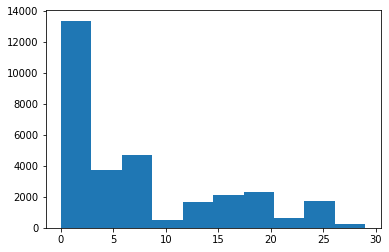

In [289]:
plt.hist(cur_train_target)

(array([1469.,  153.,  441.,  163.,  136.,  134.,  254.,   34.,   52.,
          35.]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <BarContainer object of 10 artists>)

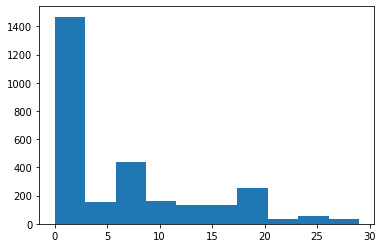

In [286]:
plt.hist(cur_target)

(array([1248.,  191.,  440.,   60.,  183.,  359.,  274.,   37.,   37.,
          42.]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <BarContainer object of 10 artists>)

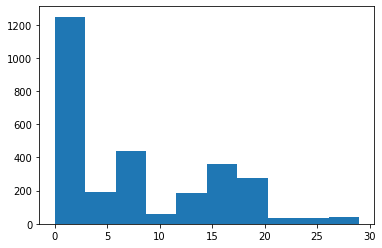

In [287]:
plt.hist(cur_pred)

### TODO: 각 레이블별로 나누어 분포 확인

In [ ]:
def pca3d(df_train, v_angle=30 ,angle=0):
    df_new = df_train.reset_index(drop=True)
#     rndperm = np.random.permutation(df_new.shape[0])
    rndperm = np.arange(len(df_new))
    label_num = df_new.loc[rndperm,:]["label"].unique()
    label_name = [idx2label[k] for k in label_num]
    ax = plt.figure(figsize=(16,10)).gca(projection='3d')

    ax.set_xlabel('pca-one')
    ax.set_ylabel('pca-two')
    ax.set_zlabel('pca-three')
    ax.view_init(v_angle, angle)
    for rel, color in zip(label_name, ['tab:blue', 'tab:orange', 'tab:green']):
        ax.scatter(
            xs=df_new.loc[df_new.label == label2idx[rel],:]["pca-one"], 
            ys=df_new.loc[df_new.label == label2idx[rel],:]["pca-two"], 
            zs=df_new.loc[df_new.label == label2idx[rel],:]["pca-three"], 
            c=color, edgecolors='none',
            label = rel,
#             cmap='Set3',
            s=15, alpha=0.7,
            )
        

    ax.legend()

    # rotate the axes and update
#         ax.save_fig(f'./analysis/{anlge}.png')
    plt.show()

In [ ]:
# Except no relation 
# df_embedding_pca3d_wo_norel = df_embedding_pca3d.query('label != 0')

In [ ]:
df_embedding_pca_norel_miss = df_embedding_pca3d_wo_norel.query('label == [11, 15, 26]')

In [ ]:
df_embedding_pca_norel_miss['label'].unique().reshape(-1, 1)

array([[15],
       [26],
       [11]])

/tmp/ipykernel_13277/1557022794.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


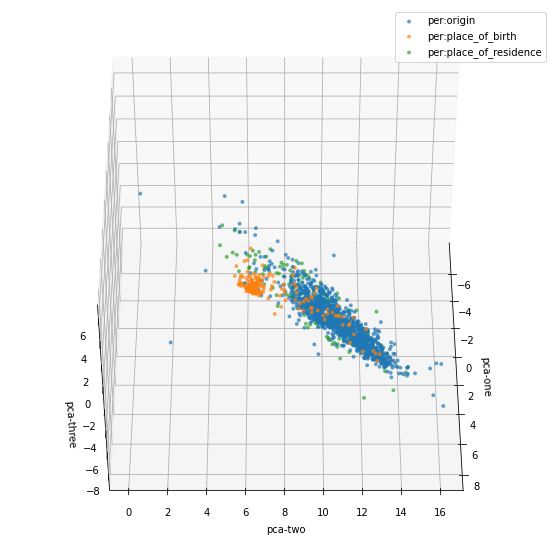

In [ ]:
pca3d(df_embedding_pca_norel_miss, 45)

/tmp/ipykernel_13277/1557022794.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


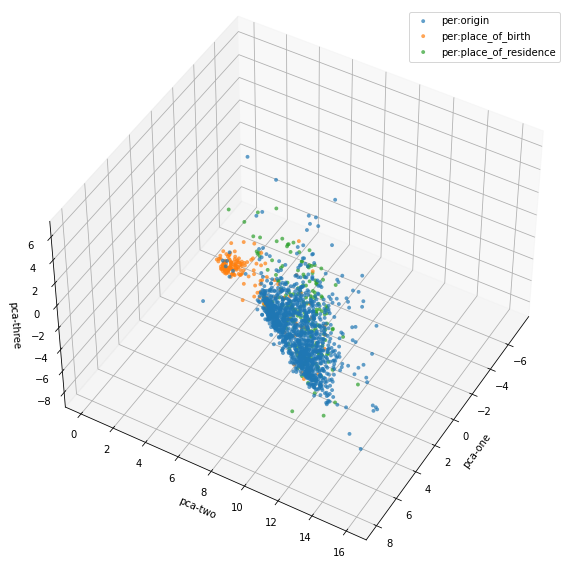

In [ ]:
pca3d(df_embedding_pca_norel_miss, 45, 30)

/tmp/ipykernel_13277/1557022794.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,10)).gca(projection='3d')


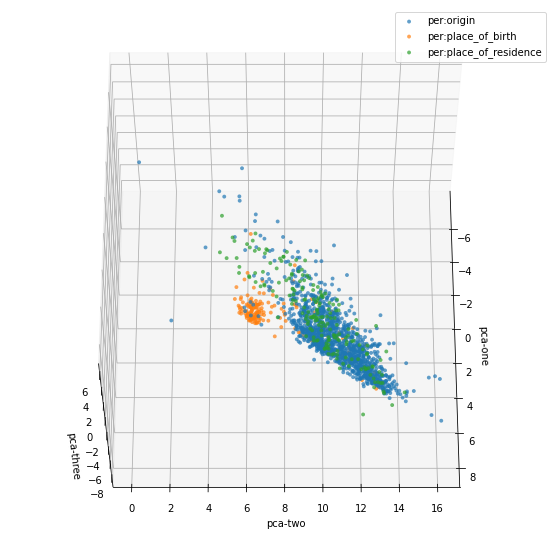

In [ ]:
pca3d(df_embedding_pca_norel_miss, 60)

## TODO: Plotly를 이용한 시각화

## Confusion Matrix